In [3]:
pip install -r requirements.txt

  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached langchain_openai-0.3.11-py3-none-any.whl.metadata (2.3 kB)
  Using cached langchain_community-0.3.20-py3-none-any.whl.metadata (2.4 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached faiss_cpu-1.10.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (4.4 kB)
  Using cached pypdf-5.4.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached arxiv-2.1.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached pymupdf-1.25.4-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached langchain_huggingface-0.1.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached langchain_groq-0.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached langgraph-0.3.21-py3-none-any.whl.metadata (7.7 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/4

In [27]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm=ChatGroq(model="qwen-2.5-32b")
result = llm.invoke("Hello")
result.content

'Hello! How can I assist you today?'

In [28]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from IPython.display import display, Image

# Graph State
class State(TypedDict):
  topic:str
  joke:str
  improved_joke:str
  final_joke:str


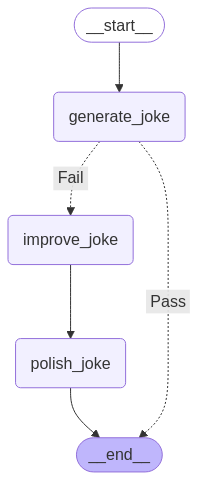

In [40]:
# Nodes
def generate_joke(state: State):
  """First LLM call to generate initial joke"""
  msg = llm.invoke(f"write a short joke about {state['topic']}")
  return {"joke": msg.content}

def check_punchline(state: State):
  """Check point to verify if the joke has a punchline"""

  if "?" in state["joke"] or "!" in state["joke"]:
    return "Fail"
  return "Pass"

def improve_joke(state: State):
  """Second LLM call to improve the joke"""

  msg = llm.invoke(f"Make this joke more funny by adding Workplay: {state['joke']}")
  return {"improved_joke": msg.content}

def polish_joke(state: State):
  """Third LLM call to polish the joke"""
  msg = llm.invoke(f"Add the surprising twist to this joke: {state['improved_joke']}")
  return {"final_joke": msg.content}

builder = StateGraph(State)

# Add Nodes
builder.add_node("generate_joke", generate_joke)
builder.add_node("improve_joke", improve_joke)
builder.add_node("polish_joke", polish_joke)

builder.add_edge(START, "generate_joke")
builder.add_conditional_edges("generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END})
builder.add_edge("improve_joke", "polish_joke")
builder.add_edge("polish_joke", END)
chain = builder.compile()
chain

In [43]:
state = chain.invoke({"topic": "mobile"})

In [44]:
state

{'topic': 'mobile',
 'joke': 'Why did the mobile phone go to the party?\n\nBecause it had a lot of apps to show off!',
 'improved_joke': 'Why did the mobile phone go to the party? \n\nBecause it had a lot of apps to show off, and it wanted to network and find its missing app - the social life!',
 'final_joke': "Why did the mobile phone go to the party?\n\nBecause it had a lot of apps to show off, and it wanted to network and find its missing app - the social life! But the real twist was when it found out the 'social life' app had been renamed to 'solitaire' and had been hiding in plain sight all along, thinking it was just there for entertainment, not for boosting social skills!"}